In [1]:
import pandas as pd
import numpy as np
import tweepy # to use Twitter’s API
#import textblob as TextBlob # for doing sentimental analysis
from textblob import TextBlob
import re # regex for cleaning the tweets

In [2]:
# Twitter Api Credentials
consumer_key = '04AVoeKt2hRofIDdaM1mtijaT'
consumer_secret = 'sy7NX99zOMVShO1TdpaApeXsQ8rqlSZq64tFY3spCaPoy2f5sE'
access_token = '941842956-FvsmKxzzp6isal1JA0eQh6F1smn2teabCYogdjZu'
access_token_secret = 'tbGYW3hYzxV7jDLw9REtFLZ5cGs2qd3rtxPoExh6exa0T'

In [3]:
def twitter():
    # Creating the authentication object
    auth = tweepy.OAuthHandler(consumer_key, consumer_secret) 
    # Setting your access token and secret
    auth.set_access_token(access_token, access_token_secret) 
    # Creating the API object while passing in auth information
    api = tweepy.API(auth, wait_on_rate_limit = True)  
    return api

In [49]:
# Creating tw object
tw = twitter()
# Extracting Ellen DeGeneres tweets
#search = tw.user_timeline(screen_name="vinnygarr", count = 1500, lang ="en")

In [161]:
tweets = []
for tweet in tweepy.Cursor(tw.user_timeline, screen_name='KatherineSacks', tweet_mode="extended").items(2000):
    tweets = np.append(tweets, [tweet.full_text])

In [162]:
#  Printing last 10 tweets
#print("5 recent tweets:\n")
#for tweets in search[:5]:
#    print(tweets.text + '\n')

In [163]:
# Converting into dataframe (Column name Tweets)
df = pd.DataFrame(tweets, columns=['Tweet'])

In [164]:
# Cleaning the tweets
# Creating a function called clean. removing hyperlink, #, RT, @mentions
def clean(x):
    #x = re.sub(r'^RT[\s]+', '', x)
    x = re.sub(r'https?:\/\/.*[\r\n]*', '', x)
    x = re.sub(r'#', '', x)
    x = re.sub(r'@[A-Za-z0–9]+', '', x) 
    return x
df['Tweet'] = df['Tweet'].apply(clean)


In [165]:
df = df[~df['Tweet'].str.contains("RT")]

In [166]:
df = df[df['Tweet'].str.len() > 26]

In [167]:
df.shape

(1671, 1)

In [168]:
polarity = lambda x: TextBlob(x).sentiment.polarity
subjectivity = lambda x: TextBlob(x).sentiment.subjectivity
df['polarity'] = df['Tweet'].apply(polarity)
df['subjectivity'] = df['Tweet'].apply(subjectivity)

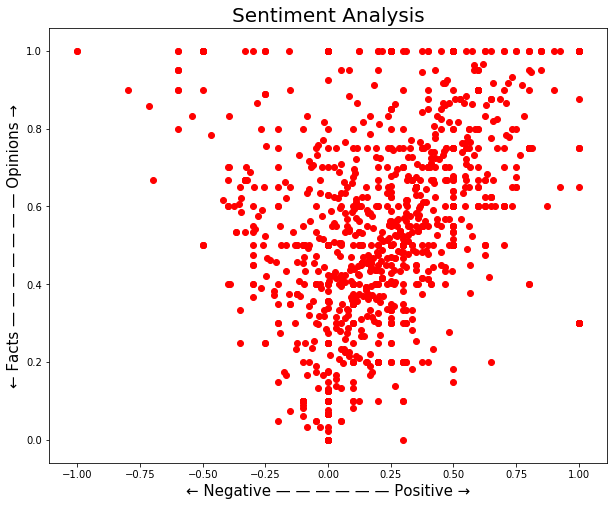

In [169]:
# Let’s plot the results
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [10, 8]
for index, Tweets in enumerate(df.index):
    x = df.polarity.loc[Tweets]
    y = df.subjectivity.loc[Tweets]
    plt.scatter(x, y, color='Red')
 
 
plt.title('Sentiment Analysis', fontsize = 20)
plt.xlabel('← Negative — — — — — — Positive →', fontsize=15)
plt.ylabel('← Facts — — — — — — — Opinions →', fontsize=15)
plt.show()

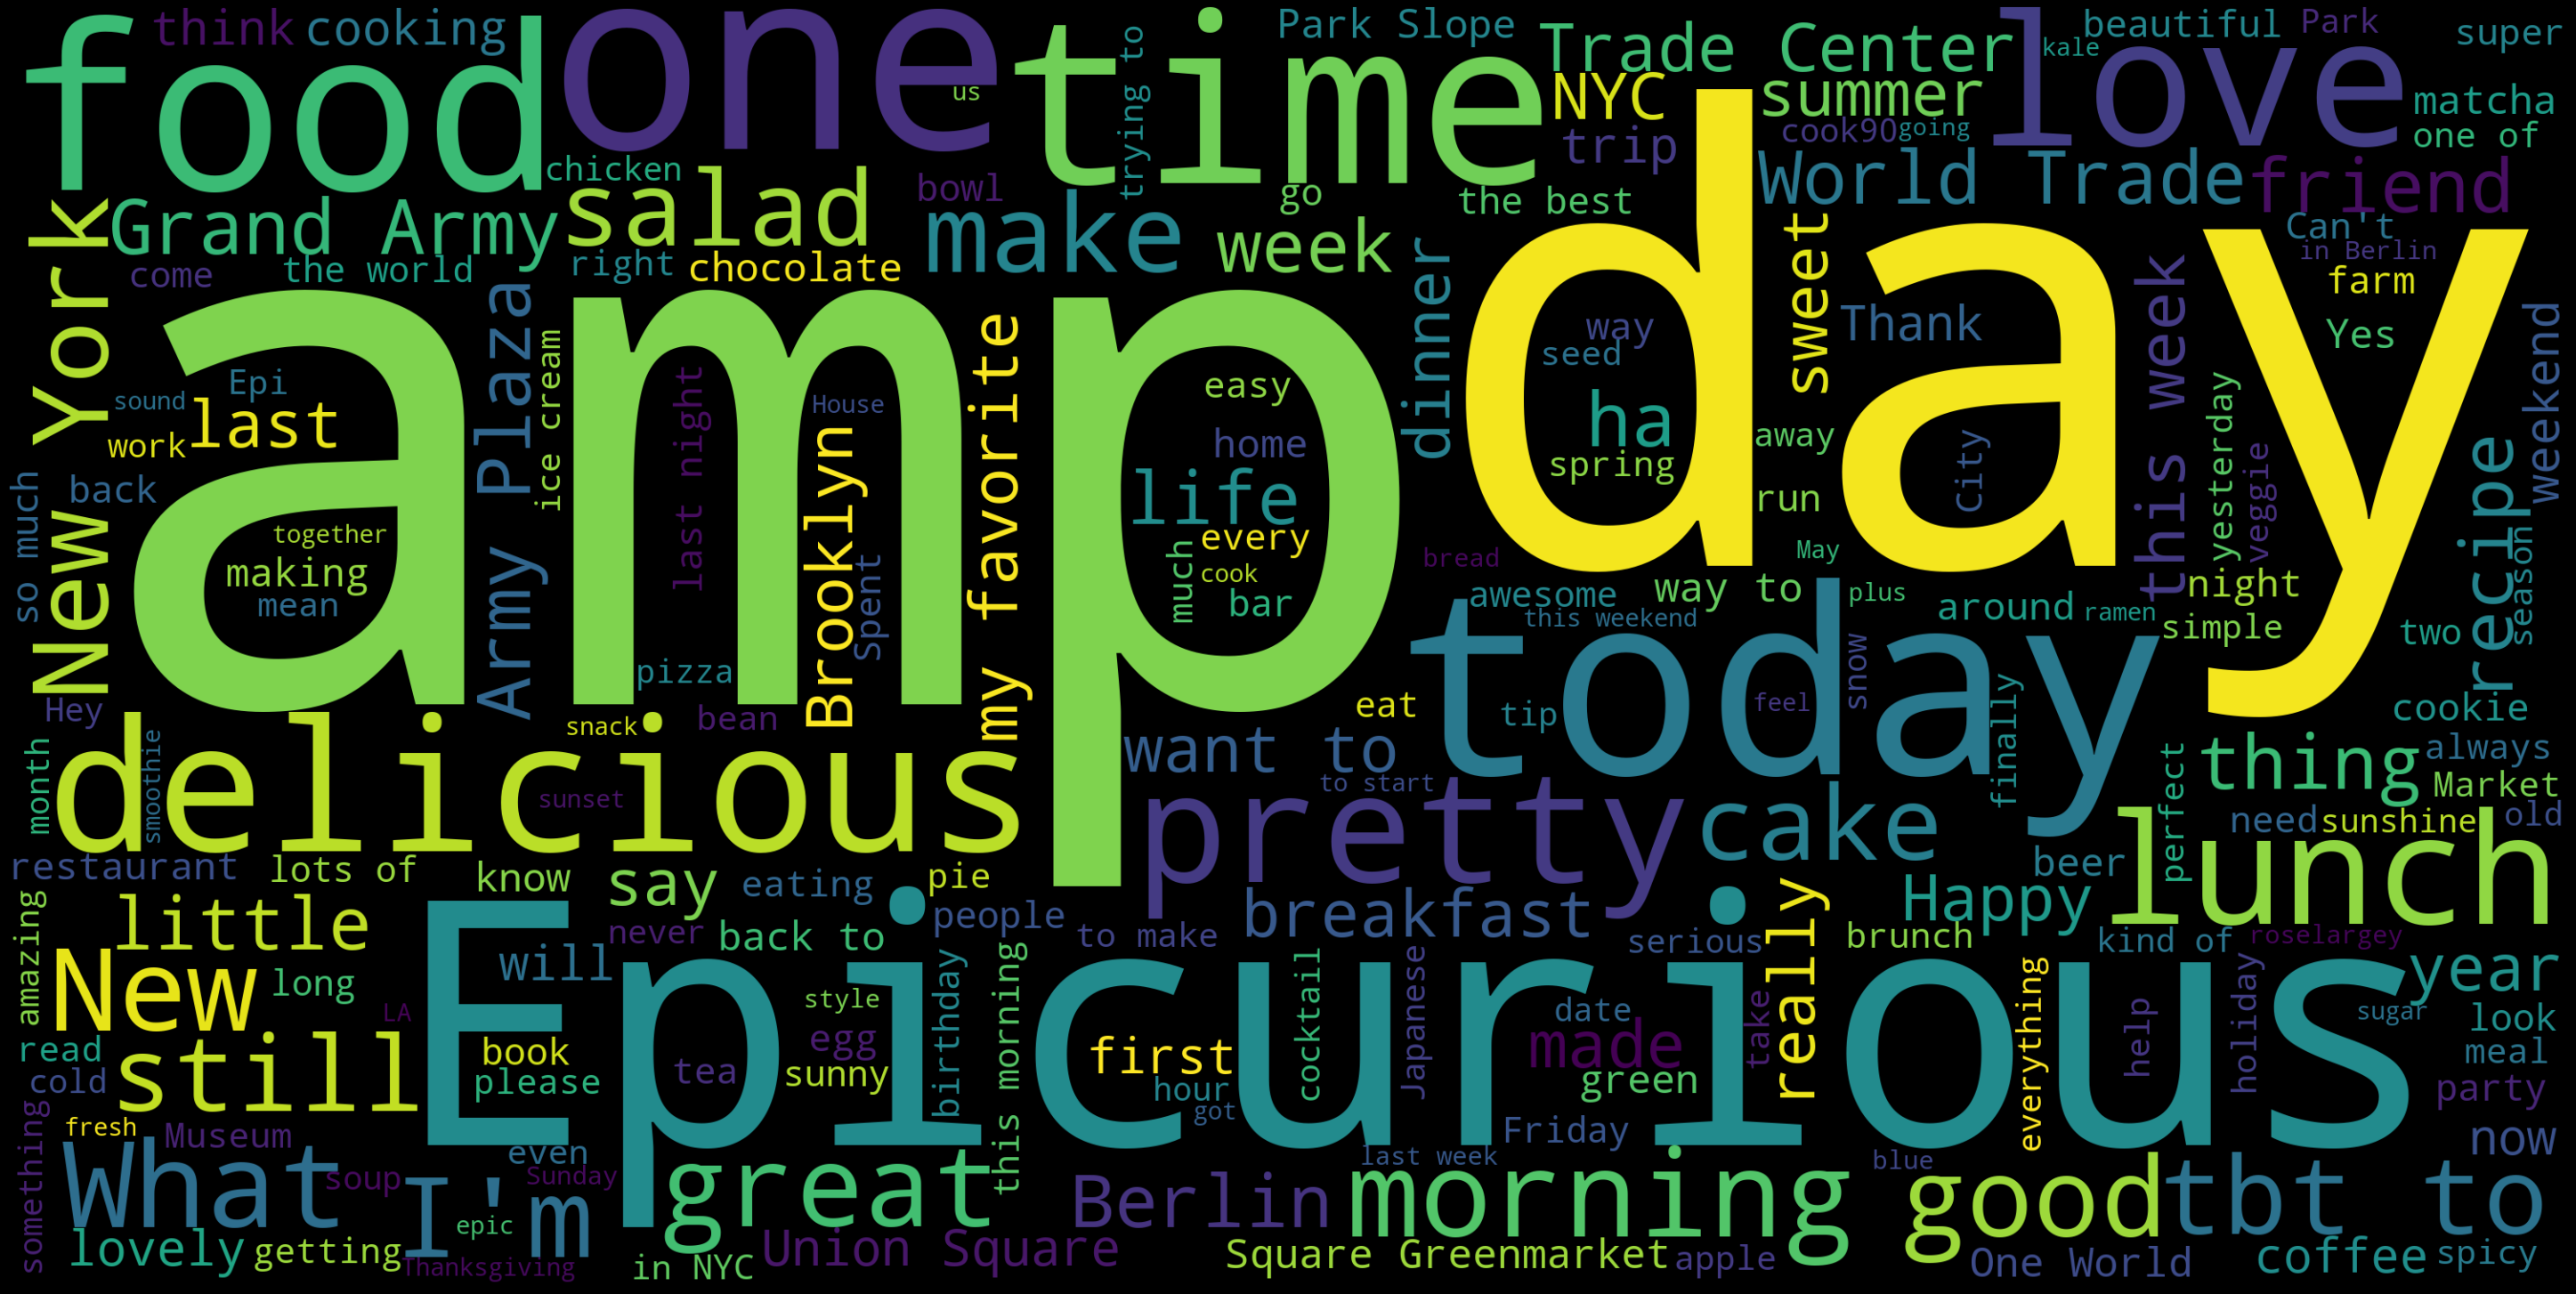

<Figure size 720x576 with 0 Axes>

In [178]:
#word cloud
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
text = df.Tweet
wordcloud = WordCloud(
    width = 3000,
    height = 1500,
    background_color = 'black',
    stopwords = STOPWORDS).generate(df.Tweet.str.cat(sep=' '))
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()
plt.savefig('katherine_sacks_word_cloud')

In [171]:
# stats
seriesTweets = df.Tweet.str.split(expand=True).stack().value_counts()
dfSanitizedWords = seriesTweets.to_frame().iloc[~seriesTweets.to_frame().index.isin(STOPWORDS)]

In [173]:
dfSanitizedWords.head(50)

,0
@,773
I,273
&amp;,209
Epicurious,133
The,102
day,94
last,69
New,67
time,54
one,50


In [176]:
import os
plt.write_image('katherine_sacks_word_cloud.png')

AttributeError: module 'matplotlib.pyplot' has no attribute 'write_image'